In [19]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
from scipy.constants import R

RT = 300 * R * 1e-3

In [20]:
df = plumed.read_as_pandas('../run_duplex/duplex.COLVAR')

weights = np.exp(df['bias.bias'] / RT)

# Rescaling factor for "nicer" integral values of the coordination numbers
scale = 1.039661

/tmp/ipykernel_3889/2533592485.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  df = plumed.read_as_pandas('../run_duplex/duplex.COLVAR')


In [21]:
df

,time,nop1,nop2,nop3,nop4,nop5,nop6,nop7,nop8,now1,...,now8,fn1,fn2,fn3,fn4,fn5,fn6,fn7,fn8,bias.bias
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,5.917083,...,5.865442,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,0.000000
1,10.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,5.891487,...,5.902907,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,0.000000
2,20.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,5.900734,...,6.162464,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,0.000000
3,30.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,5.923291,...,5.917787,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,0.000000
4,40.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,5.907662,...,5.925979,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,22480.0,0.0,0.000000,0.0,0.000000,0.0,0.976963,0.0,0.0,5.894649,...,5.855537,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.185262,-0.0,-0.0,-0.185262
2249,22490.0,0.0,0.000000,0.0,0.009845,0.0,0.973386,0.0,0.0,5.905845,...,5.846490,-0.0,-0.000000,-0.0,-0.0,-0.0,-1.049509,-0.0,-0.0,-1.049509
2250,22500.0,0.0,0.000000,0.0,0.000000,0.0,0.981155,0.0,0.0,5.784934,...,5.893086,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.738826,-0.0,-0.0,-0.738826
2251,22510.0,0.0,0.104496,0.0,0.004116,0.0,0.978880,0.0,0.0,5.834295,...,5.984572,-0.0,-0.011697,-0.0,-0.0,-0.0,-0.102885,-0.0,-0.0,-0.114582


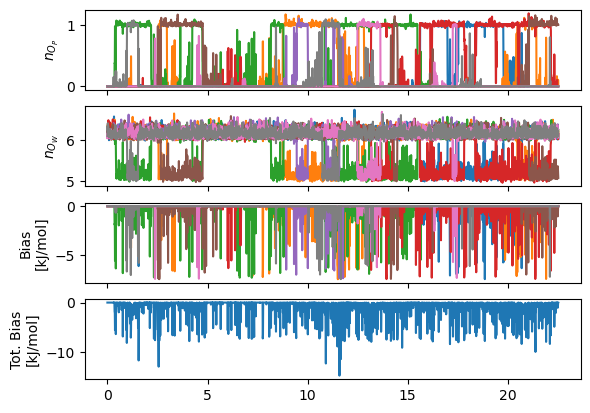

In [22]:
fig, axarr = plt.subplots(nrows=4, sharex=True)

ax = axarr[0]
for i in range(1, 9):
    ax.plot(df.time / 1000, df[f'nop{i}'] * scale)
ax.set_ylabel(r"$n_{O_P}$")

ax = axarr[1]
for i in range(1, 9):
    ax.plot(df.time / 1000, df[f'now{i}'] * scale)
ax.set_ylabel(r"$n_{O_W}$")


ax = axarr[2]
for i in range(1, 9):
    ax.plot(df.time / 1000, df[f'fn{i}'])
ax.set_ylabel("Bias\n[kJ/mol]")

ax = axarr[3]
ax.plot(df.time / 1000, df['bias.bias'])
ax.set_ylabel("Tot. Bias\n[kJ/mol]")

plt.savefig('duplex_timeseries.png')

In [23]:
def kish_ratio(weights):
    return weights.sum()**2 / (weights**2).sum() / len(weights)

print(kish_ratio(weights))

0.8698966021627705
